In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Importing data (pretreated)
# Split the data into numerical and catagorical. Decide if any columns need their dtype changed.
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
target = pd.read_csv('target.csv')

In [31]:
donations = pd.concat([numerical, categorical,target], axis=1)

In [33]:
# Woops, I somehow overlooked 2 NaN values earlie when cleaning in another lab, so quickly exclude those (just 2, 
# should be fine)

nan_rows = donations.isna().any(axis=1)
num_nan_rows = nan_rows.sum()
display(num_nan_rows)

donations = donations.dropna()

2

# Logistic Regression model without managing imbalance, without feature selection

In [54]:
numerical = donations.select_dtypes(include=np.number)
categorical = donations.select_dtypes(exclude=np.number)

In [55]:
# X-y split with TARGET_D as y
X = pd.concat([numerical, categorical], axis=1)
y = donations['TARGET_B']

In [56]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [58]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0.000000,0.624862,0.666667,1.000000,0.000000,0.000000,0.404040,0.373737,0.353535,0.112676,...,0.909091,0.181818,0.909091,0.000000,0.5,0.000000,0.957447,0.090909,0.0,0.00
1,0.000014,0.624862,0.666667,1.000000,0.000000,0.000000,0.303030,0.222222,0.606061,0.084507,...,0.863636,0.000000,0.863636,0.727273,0.0,0.909091,0.957447,0.000000,0.0,0.00
2,0.000014,0.690722,0.166667,0.777778,0.053942,0.000000,0.373737,0.313131,0.272727,0.126761,...,0.772727,0.363636,0.909091,0.636364,0.5,0.000000,0.808511,0.000000,0.0,0.00
3,0.000000,0.624862,0.166667,0.111111,0.000000,0.000000,0.404040,0.515152,0.232323,0.000000,...,0.909091,0.090909,0.909091,0.363636,0.5,0.090909,0.978723,0.000000,0.0,0.00
4,0.000000,0.783505,0.666667,1.000000,0.000000,0.010204,0.303030,0.333333,0.363636,0.098592,...,0.727273,0.909091,0.909091,1.000000,0.0,1.000000,0.893617,0.909091,1.0,0.19


In [59]:
X_train_categorical = X_train.select_dtypes(include = np.object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             drop_first=True)
X_train_cat.head()

C:\Users\a\AppData\Local\Temp\ipykernel_17612\2272654368.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_categorical = X_train.select_dtypes(include = np.object)


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
86190,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
82496,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
77469,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
41776,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
35475,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [60]:
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

In [61]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [62]:
X_test_num = X_test.select_dtypes(include = np.number)

In [63]:
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [64]:
X_test_categorical = X_test.select_dtypes(include = np.object)
X_test_cat = pd.get_dummies(X_test_categorical,
                            drop_first=True)

C:\Users\a\AppData\Local\Temp\ipykernel_17612\958517610.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_categorical = X_test.select_dtypes(include = np.object)


In [65]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [66]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

1.0

#### Probably the model predicted no donation in most/all cases and since most of the data observed/most people didn't donate, it is pretty "accurate" in this assumption.

# Starting again from 0 and building model with feature selection and managing imbalance

## Feature selection

#### Going for variance threshold with 0.01 first and then the kbest of those

In [84]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
target = pd.read_csv('target.csv')

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [86]:
X = numerical_scaled
y = target['TARGET_B']

In [87]:
# from sklearn.feature_selection import RFE
# from sklearn import linear_model
# lm = linear_model.LinearRegression()
# rfe = RFE(lm, n_features_to_select=20, verbose=False)
# rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=20, verbose=False)

In [90]:
# df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
# df['Column_name'] = pd.DataFrame(numerical).columns
# list(df[df['Rank']==1]['Column_name'])
# #df['Rank'].value_counts()

# # rfe.ranking_ all with the number 1  

In [95]:
from sklearn.feature_selection import VarianceThreshold 
var_threshold = 0.01
sel = VarianceThreshold(threshold=(var_threshold)) #sel = selector

sel = sel.fit(numerical_scaled)
temp = sel.transform(numerical_scaled)
temp = pd.DataFrame(temp)
print(numerical_scaled.shape)
print(temp.shape)

(95412, 315)
(95412, 127)


In [97]:
numerical_scaled_varth = temp

Kbest

In [105]:
X = numerical_scaled_varth
y = target['TARGET_B']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kbest = SelectKBest(chi2, k=20).fit_transform(X, y)
# Here we choose 10 so that is easier to analyze results later, as we will see
selected = pd.DataFrame(kbest)
selected.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.666667,0.010101,0.079833,0.105833,0.153846,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.020202,0.050505,0.171717,0.433333,0.366492,0.341463,1.000000,0.622951
1,0.833333,0.000000,0.911333,0.869667,0.769231,0.000000,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.919192,0.919192,0.919192,0.183333,0.146597,0.024390,0.333333,0.000000
2,0.333333,0.020202,0.082833,0.091000,0.076923,0.010101,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.000000,0.020202,0.090909,0.416667,0.308901,0.341463,1.000000,0.967213
3,0.000000,0.000000,0.166667,0.210500,0.076923,0.000000,0.101010,0.252525,0.505051,0.696970,0.929293,0.101010,0.010101,0.080808,0.171717,0.433333,0.324607,0.170732,1.000000,0.655738
4,0.333333,0.989899,0.096000,0.099000,0.230769,0.585859,0.000000,0.010101,0.020202,0.161616,0.676768,0.000000,0.252525,0.585859,0.747475,0.700000,0.570681,0.195122,0.333333,0.409836


In [106]:
numerical_scaled_varth_kbest = selected.copy()

In [107]:
numerical_scaled_varth_kbest.shape

(95412, 20)

## Checking multicolinearity

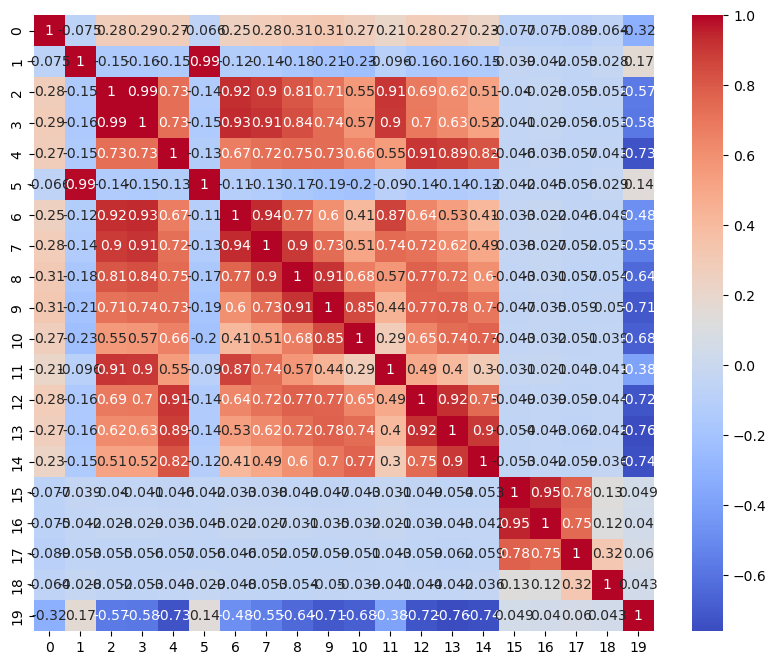

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(numerical_scaled_varth_kbest.corr(), annot=True, cmap='coolwarm')
plt.show()

In [109]:
drop_list = [5,2,6,7,1','4','10']

In [110]:
numerical_scaled_varth_kbest = numerical_scaled_varth_kbest.drop(columns=drop_list)
numerical_scaled_varth_kbest.shape()

KeyError: "['5', '2', '6', '7', '11', '4', '10'] not found in axis"

## Managing imbalance

In [102]:
target['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [ ]:
dona = np.concatenate([numerical_scaled_varth_kbest, categorical], axis=1)

In [74]:
data_B = donations.drop(['TARGET_D'], axis=1).copy()
# data_B.head()

In [75]:
from sklearn.utils import resample

category_0 = data_B[data_B['TARGET_B'] == 0]
category_1 = data_B[data_B['TARGET_B'] == 1]

In [76]:
# Oversampling so we don't loose so much data

category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [77]:
print(category_0.shape)
print(category_1_oversampled.shape)

(90567, 338)
(90567, 338)


In [78]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [81]:
data_upsampled['STATE'].unique()

array(['IL', 'CA', 'NC', 'FL', 'other', 'IN', 'MI', 'MO', 'TX', 'WA',
       'WI', 'GA'], dtype=object)